Train RMSE: 13.419302936362923
Test RMSE: 20.137053604671337


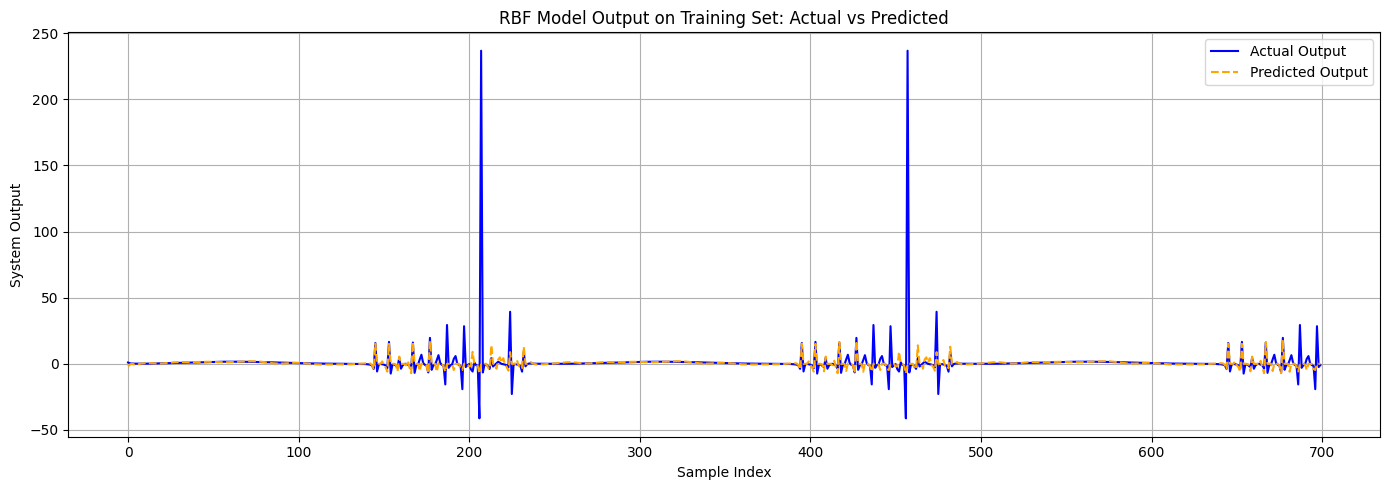

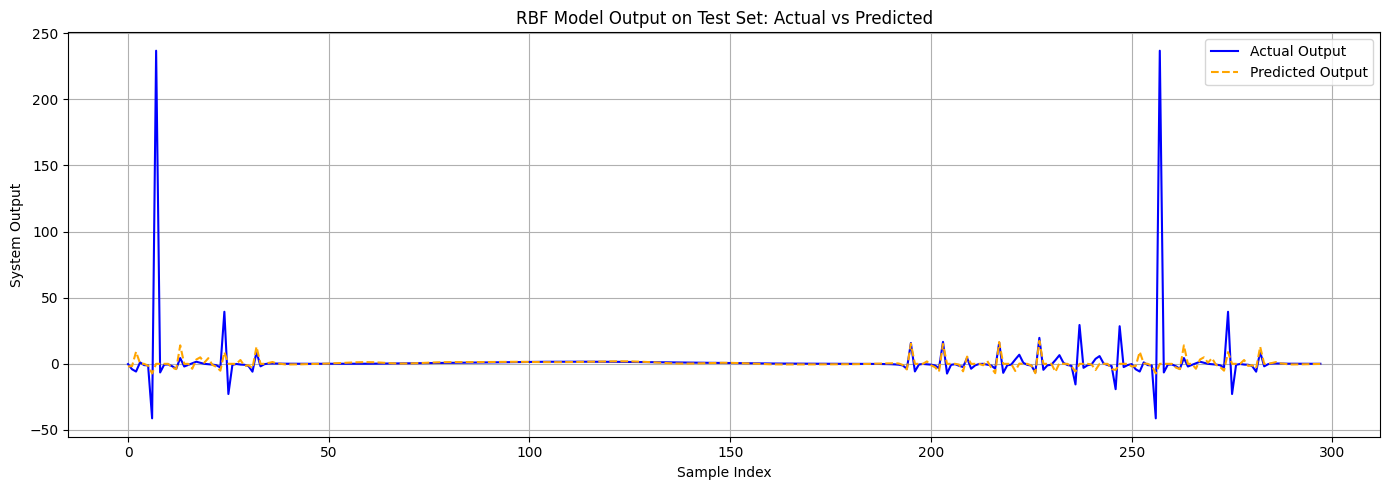

In [2]:
# Cell 1: Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Cell 2: Define RBF function
def rbf(x, mu, sigma):
    distance = np.linalg.norm(x - mu) ** 2
    return np.exp(-distance / (2 * sigma ** 2))

# Cell 3: Create the dataset
N = 1000
y = np.zeros(N)
y[0] = 0
y[1] = 1

def u(t):
    return np.sin(2 * np.pi * t / 250)

for t in range(2, N):
    y[t] = y[t-1] / (1 + y[t-2]) + u(t-1)**3

X = np.zeros((N-2, 3))
T = np.zeros(N-2)

for t in range(2, N):
    X[t-2] = [y[t-1], y[t-2], u(t-1)]
    T[t-2] = y[t]

# Cell 4: Split data into training and testing
X_train = X[:700]
T_train = T[:700]
X_test = X[700:]
T_test = T[700:]

# Cell 5: RBFNN Training function
def train_rbf(X_train, T_train, K, sigma):
    # Select K random centers from the training data
    np.random.seed(0)
    centers = X_train[np.random.choice(len(X_train), K, replace=False)]

    # Create activation matrix Phi for training data
    Phi_train = np.array([[rbf(x, c, sigma) for c in centers] for x in X_train])

    # Solve for weights using Least Squares
    alpha = np.linalg.pinv(Phi_train.T @ Phi_train) @ Phi_train.T @ T_train
    return alpha, centers

# Cell 6: Predict using the trained RBFNN model
def predict_rbf(X, centers, alpha, sigma):
    Phi = np.array([[rbf(x, c, sigma) for c in centers] for x in X])
    return Phi @ alpha

# Cell 7: Train model and make predictions
K = 20  # number of neurons
sigma = 1.0  # width of the RBF neurons
alpha, centers = train_rbf(X_train, T_train, K, sigma)

# Predict on training and test sets
T_train_pred = predict_rbf(X_train, centers, alpha, sigma)
T_test_pred = predict_rbf(X_test, centers, alpha, sigma)

# Calculate RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(T_train, T_train_pred))
rmse_test = np.sqrt(mean_squared_error(T_test, T_test_pred))

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

# Cell 8: Plotting results for training data
plt.figure(figsize=(14, 5))
plt.plot(T_train, label='Actual Output', color='blue')
plt.plot(T_train_pred, label='Predicted Output', color='orange', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("System Output")
plt.title("RBF Model Output on Training Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 9: Plotting results for test data
plt.figure(figsize=(14, 5))
plt.plot(T_test, label='Actual Output', color='blue')
plt.plot(T_test_pred, label='Predicted Output', color='orange', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("System Output")
plt.title("RBF Model Output on Test Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [3]:
import numpy as np

# تعریف تابع برای محاسبه وزن‌ها با رگولاریزیشن L2
def compute_ridge_regression(X, Y, lambda_val):
    """
    محاسبه وزن‌های مدل با استفاده از رگولاریزیشن L2 (رگولاریزیشن Ridge)
    
    :param X: ماتریس ویژگی‌ها (Phi)
    :param Y: بردار خروجی‌ها (Y)
    :param lambda_val: مقدار پارامتر رگولاریزیشن (lambda)
    :return: وزن‌های بهینه (alpha)
    """
    # ماتریس همبستگی ویژگی‌ها (X^T * X)
    XT_X = np.dot(X.T, X)
    
    # ماتریس همبستگی خروجی‌ها (X^T * Y)
    XT_Y = np.dot(X.T, Y)
    
    # اعمال رگولاریزیشن L2
    I = np.eye(X.shape[1])  # ماتریس همانی با ابعاد X
    alpha = np.linalg.solve(XT_X + lambda_val * I, XT_Y)  # حل معادله
    
    return alpha

# نمونه داده‌ها برای X و Y (برای مثال)
N = 100  # تعداد نمونه‌ها
M = 3    # تعداد ویژگی‌ها

# تولید داده‌های تصادفی برای ویژگی‌ها (X) و خروجی‌ها (Y)
np.random.seed(0)
X = np.random.randn(N, M)  # ماتریس ویژگی‌ها (Phi)
Y = np.random.randn(N)     # بردار خروجی‌ها (Y)

# مقدار پارامتر رگولاریزیشن (lambda)
lambda_val = 0.1

# محاسبه وزن‌های مدل (alpha)
alpha = compute_ridge_regression(X, Y, lambda_val)

# نمایش نتیجه
print("Weight coefficients (alpha):", alpha)


Weight coefficients (alpha): [-0.06273579 -0.07082016  0.06611289]


RMSE for K=1 (1-10): 0.9499630944449166
RMSE for K=2 (1-10): 1.2881245886758534
RMSE for K=3 (1-10): 1.7589801665144111
RMSE for K=4 (1-10): 2.2615630472621646
RMSE for K=5 (1-10): 2.634193904972693
RMSE for K=6 (1-10): 3.3219855405308474
RMSE for K=7 (1-10): 3.975619248450491
RMSE for K=8 (1-10): 4.412348760831147
RMSE for K=9 (1-10): 4.828869207054486
RMSE for K=10 (1-10): 5.407133809645174
RMSE for K=10 (10-50): 5.407133809645174
RMSE for K=11 (10-50): 6.056006376191868
RMSE for K=12 (10-50): 6.615503854900553
RMSE for K=13 (10-50): 6.990737945927295
RMSE for K=14 (10-50): 7.6913351029062325
RMSE for K=15 (10-50): 7.994895615461142
RMSE for K=16 (10-50): 8.368373131574529
RMSE for K=17 (10-50): 9.095839088190646
RMSE for K=18 (10-50): 9.129761508929807
RMSE for K=19 (10-50): 9.463355765243238
RMSE for K=20 (10-50): 10.198124275109178
RMSE for K=21 (10-50): 10.895963335495546
RMSE for K=22 (10-50): 12.219503139050476
RMSE for K=23 (10-50): 13.231228183142724
RMSE for K=24 (10-50): 13

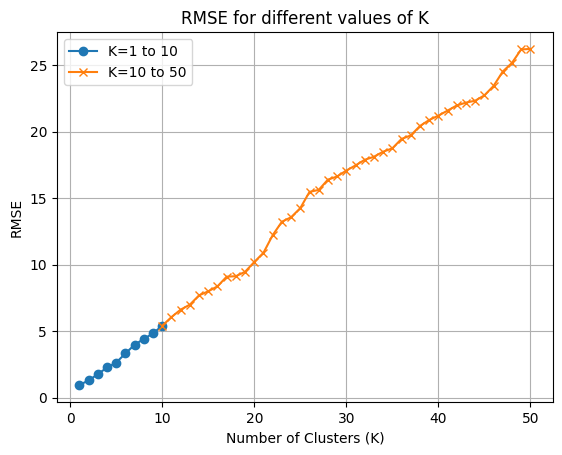

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# فرض کنید X_train داده‌های ورودی شما هستند و T_train داده‌های هدف

# تعداد نمونه‌ها و ویژگی‌ها
N = 100  # تعداد نمونه‌ها
M = 3    # تعداد ویژگی‌ها

# تولید داده‌های تصادفی (برای مثال)
np.random.seed(0)
X_train = np.random.randn(N, M)  # داده‌های ورودی
T_train = np.random.randn(N)     # داده‌های هدف (برای تست)

# تابع برای انجام K-Means و محاسبه RMSE
def kmeans_rms_error(X, T, max_k_low=10, max_k_high=50):
    rmses_low = []  # RMSE برای K از 1 تا 10
    rmses_high = []  # RMSE برای K از 10 تا 50
    
    # بخش اول: K از 1 تا 10
    for k in range(1, max_k_low+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)  # الگوریتم K-Means را روی داده‌های ورودی آموزش می‌دهیم
        
        # پیش‌بینی مراکز داده برای داده‌های آموزش
        T_pred = kmeans.predict(X)
        
        # محاسبه RMSE
        rmse = np.sqrt(mean_squared_error(T, T_pred))
        rmses_low.append(rmse)
        
        print(f"RMSE for K={k} (1-10): {rmse}")
    
    # بخش دوم: K از 10 تا 50 (یا بیشتر از 10)
    for k in range(max_k_low, max_k_high+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)  # الگوریتم K-Means را روی داده‌های ورودی آموزش می‌دهیم
        
        # پیش‌بینی مراکز داده برای داده‌های آموزش
        T_pred = kmeans.predict(X)
        
        # محاسبه RMSE
        rmse = np.sqrt(mean_squared_error(T, T_pred))
        rmses_high.append(rmse)
        
        print(f"RMSE for K={k} (10-50): {rmse}")
    
    # رسم نمودار RMSE برای K از 1 تا 10
    plt.plot(range(1, max_k_low+1), rmses_low, marker='o', label='K=1 to 10')
    
    # رسم نمودار RMSE برای K از 10 تا 50
    plt.plot(range(max_k_low, max_k_high+1), rmses_high, marker='x', label='K=10 to 50')
    
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('RMSE')
    plt.title('RMSE for different values of K')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return rmses_low, rmses_high

# اجرای کد برای K از 1 تا 50
rmses_low, rmses_high = kmeans_rms_error(X_train, T_train, max_k_low=10, max_k_high=50)


RMSE for K=1: 0.0
RMSE for K=2: 0.6277147707311724
RMSE for K=3: 0.7462347528502391
RMSE for K=4: 0.757171844118168
RMSE for K=5: 0.8104885390433456
RMSE for K=6: 0.8374278277621781
RMSE for K=7: 0.8578033043155966
RMSE for K=8: 0.8575421333823409
RMSE for K=9: 0.8601282346192852
RMSE for K=10: 0.8639176025931458


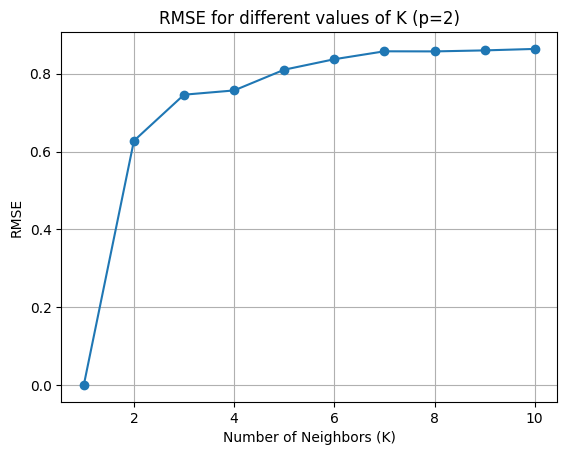

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# فرض کنید X_train داده‌های ورودی شما هستند و T_train داده‌های هدف
# تعداد نمونه‌ها و ویژگی‌ها
N = 100  # تعداد نمونه‌ها
M = 3    # تعداد ویژگی‌ها

# تولید داده‌های تصادفی (برای مثال)
np.random.seed(0)
X_train = np.random.randn(N, M)  # داده‌های ورودی
T_train = np.random.randn(N)     # داده‌های هدف (برای تست)

# تابع برای انجام K-Nearest Neighbors (KNN) و محاسبه RMSE
def knn_rms_error(X, T, p=2, max_neighbors=10):
    rmses = []  # لیستی برای ذخیره RMSE برای مقادیر مختلف K
    
    # تست K از 1 تا max_neighbors
    for k in range(1, max_neighbors + 1):
        # مدل KNeighborsRegressor با استفاده از p=2 (معیار فاصله اقلیدسی)
        knn = KNeighborsRegressor(n_neighbors=k, p=p)
        knn.fit(X, T)  # الگوریتم KNN را روی داده‌های ورودی آموزش می‌دهیم
        
        # پیش‌بینی مقادیر خروجی برای داده‌های آموزش
        T_pred = knn.predict(X)
        
        # محاسبه RMSE
        rmse = np.sqrt(mean_squared_error(T, T_pred))
        rmses.append(rmse)
        
        print(f"RMSE for K={k}: {rmse}")
    
    # رسم نمودار RMSE در برابر K
    plt.plot(range(1, max_neighbors + 1), rmses, marker='o')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('RMSE')
    plt.title(f'RMSE for different values of K (p={p})')
    plt.grid(True)
    plt.show()
    
    return rmses

# اجرای کد برای K از 1 تا 10
rmses = knn_rms_error(X_train, T_train, p=2, max_neighbors=10)


RMSE for K=1 (Train): 0.0
RMSE for K=1 (Test): 1.1638118619690805
RMSE for K=2 (Train): 0.6277147707311724
RMSE for K=2 (Test): 0.9463225869687067
RMSE for K=3 (Train): 0.7462347528502391
RMSE for K=3 (Test): 0.9300665836992784
RMSE for K=4 (Train): 0.757171844118168
RMSE for K=4 (Test): 0.9005692021708406
RMSE for K=5 (Train): 0.8104885390433456
RMSE for K=5 (Test): 0.9040418596793282
RMSE for K=6 (Train): 0.8374278277621781
RMSE for K=6 (Test): 0.9456141446338026
RMSE for K=7 (Train): 0.8578033043155966
RMSE for K=7 (Test): 0.9526644867581138
RMSE for K=8 (Train): 0.8575421333823409
RMSE for K=8 (Test): 0.9599695377744792
RMSE for K=9 (Train): 0.8601282346192852
RMSE for K=9 (Test): 0.9434394423986635
RMSE for K=10 (Train): 0.8639176025931458
RMSE for K=10 (Test): 0.9473484124649567


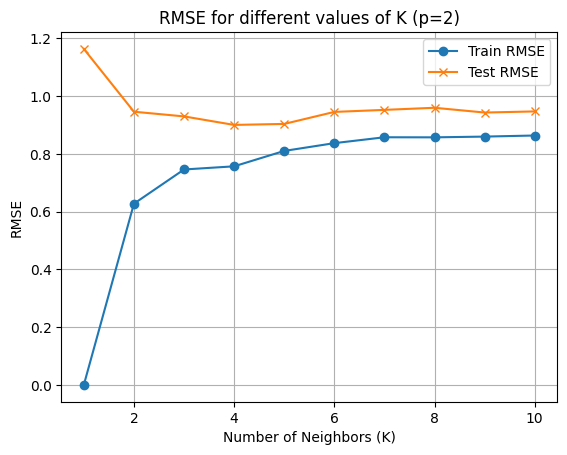

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# فرض کنید X_train داده‌های ورودی شما هستند و T_train داده‌های هدف
# فرض داده‌ای برای آموزش و تست
N_train = 100  # تعداد نمونه‌ها در داده‌های آموزش
N_test = 50    # تعداد نمونه‌ها در داده‌های تست
M = 3          # تعداد ویژگی‌ها

# تولید داده‌های تصادفی برای داده‌های آموزش و تست
np.random.seed(0)
X_train = np.random.randn(N_train, M)  # داده‌های ورودی آموزش
T_train = np.random.randn(N_train)     # خروجی‌های آموزش
X_test = np.random.randn(N_test, M)    # داده‌های ورودی تست
T_test = np.random.randn(N_test)       # خروجی‌های تست

# تابع برای انجام K-Nearest Neighbors (KNN) و محاسبه RMSE برای داده‌های آموزش و تست
def knn_rms_error(X_train, T_train, X_test, T_test, p=2, max_neighbors=10):
    rmses_train = []  # لیستی برای ذخیره RMSE برای داده‌های آموزش
    rmses_test = []   # لیستی برای ذخیره RMSE برای داده‌های تست
    
    # تست K از 1 تا max_neighbors
    for k in range(1, max_neighbors + 1):
        # مدل KNeighborsRegressor با استفاده از p=2 (معیار فاصله اقلیدسی)
        knn = KNeighborsRegressor(n_neighbors=k, p=p)
        knn.fit(X_train, T_train)  # آموزش مدل با داده‌های آموزش
        
        # پیش‌بینی مقادیر خروجی برای داده‌های آموزش
        T_train_pred = knn.predict(X_train)
        # پیش‌بینی مقادیر خروجی برای داده‌های تست
        T_test_pred = knn.predict(X_test)
        
        # محاسبه RMSE برای داده‌های آموزش
        rmse_train = np.sqrt(mean_squared_error(T_train, T_train_pred))
        rmses_train.append(rmse_train)
        
        # محاسبه RMSE برای داده‌های تست
        rmse_test = np.sqrt(mean_squared_error(T_test, T_test_pred))
        rmses_test.append(rmse_test)
        
        print(f"RMSE for K={k} (Train): {rmse_train}")
        print(f"RMSE for K={k} (Test): {rmse_test}")
    
    # رسم نمودار RMSE برای داده‌های آموزش و تست
    plt.plot(range(1, max_neighbors + 1), rmses_train, marker='o', label='Train RMSE')
    plt.plot(range(1, max_neighbors + 1), rmses_test, marker='x', label='Test RMSE')
    
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('RMSE')
    plt.title(f'RMSE for different values of K (p={p})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return rmses_train, rmses_test

# اجرای کد برای K از 1 تا 10
rmses_train, rmses_test = knn_rms_error(X_train, T_train, X_test, T_test, p=2, max_neighbors=10)


Silhouette Score for K=2: 0.20161385658639525
Silhouette Score for K=3: 0.23321314000034846
Silhouette Score for K=4: 0.2609574320762873
Silhouette Score for K=5: 0.2643432020713003
Silhouette Score for K=6: 0.2770251105493599
Silhouette Score for K=7: 0.28385097697711786
Silhouette Score for K=8: 0.24258593599764808
Silhouette Score for K=9: 0.2753874518428049
Silhouette Score for K=10: 0.267699107600769


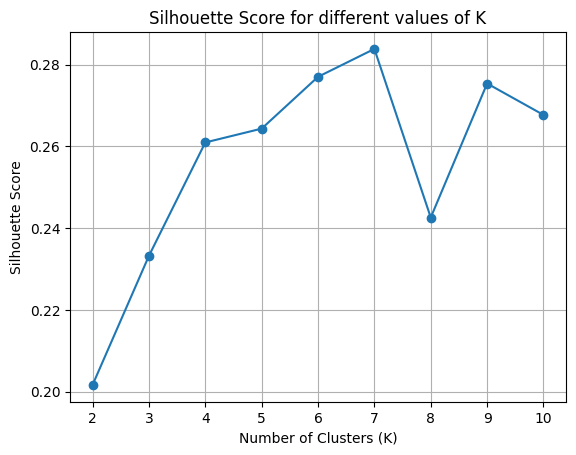

RMSE for K=1, sigma=0.1: 0.0
RMSE for K=1, sigma=0.3111111111111111: 0.0
RMSE for K=1, sigma=0.5222222222222223: 0.0
RMSE for K=1, sigma=0.7333333333333333: 0.0
RMSE for K=1, sigma=0.9444444444444444: 0.0
RMSE for K=1, sigma=1.1555555555555557: 0.0
RMSE for K=1, sigma=1.3666666666666667: 0.0
RMSE for K=1, sigma=1.577777777777778: 0.0
RMSE for K=1, sigma=1.788888888888889: 0.0
RMSE for K=1, sigma=2.0: 0.0
RMSE for K=2, sigma=0.1: 0.6277147707311724
RMSE for K=2, sigma=0.3111111111111111: 0.6277147707311724
RMSE for K=2, sigma=0.5222222222222223: 0.6277147707311724
RMSE for K=2, sigma=0.7333333333333333: 0.6277147707311724
RMSE for K=2, sigma=0.9444444444444444: 0.6277147707311724
RMSE for K=2, sigma=1.1555555555555557: 0.6277147707311724
RMSE for K=2, sigma=1.3666666666666667: 0.6277147707311724
RMSE for K=2, sigma=1.577777777777778: 0.6277147707311724
RMSE for K=2, sigma=1.788888888888889: 0.6277147707311724
RMSE for K=2, sigma=2.0: 0.6277147707311724
RMSE for K=3, sigma=0.1: 0.7462347

In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# فرض کنید X_train داده‌های ورودی شما هستند و T_train داده‌های هدف

# تعداد نمونه‌ها و ویژگی‌ها
N = 100  # تعداد نمونه‌ها
M = 3    # تعداد ویژگی‌ها

# تولید داده‌های تصادفی (برای مثال)
np.random.seed(0)
X_train = np.random.randn(N, M)  # داده‌های ورودی
T_train = np.random.randn(N)     # داده‌های هدف

# تابع برای انجام K-Means و محاسبه Silhouette Score
def kmeans_silhouette(X, max_k=10):
    silhouette_scores = []  # لیستی برای ذخیره Silhouette Score برای K‌های مختلف
    
    for k in range(2, max_k+1):  # K باید از 2 شروع شود
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)  # الگوریتم K-Means را روی داده‌های ورودی آموزش می‌دهیم
        
        # محاسبه Silhouette Score برای K
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"Silhouette Score for K={k}: {score}")
    
    # رسم نمودار Silhouette Score در برابر K
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for different values of K')
    plt.grid(True)
    plt.show()

    return silhouette_scores

# اجرای کد برای K از 2 تا 10
silhouette_scores = kmeans_silhouette(X_train, max_k=10)

# تابع برای انتخاب بهینه پارامترهای RBF
def rbf_optimization(X, T, max_k=10, sigma_range=(0.1, 2)):
    rmses = []  # لیستی برای ذخیره RMSE برای مقادیر مختلف K و sigma
    
    for k in range(1, max_k+1):
        for sigma in np.linspace(sigma_range[0], sigma_range[1], 10):
            # ساخت RBF مدل
            knn = KNeighborsRegressor(n_neighbors=k, p=2)
            knn.fit(X, T)  # آموزش مدل
            T_pred = knn.predict(X)  # پیش‌بینی خروجی‌ها
            
            # محاسبه RMSE برای مدل
            rmse = np.sqrt(mean_squared_error(T, T_pred))
            rmses.append((k, sigma, rmse))
            print(f"RMSE for K={k}, sigma={sigma}: {rmse}")
    
    # نمایش نتایج
    min_rmse = min(rmses, key=lambda x: x[2])
    print(f"Best K and sigma: K={min_rmse[0]}, sigma={min_rmse[1]}, RMSE={min_rmse[2]}")

    return rmses

# اجرای بهینه‌سازی RBF برای K از 1 تا 10 و سیگما از 0.1 تا 2
rbf_results = rbf_optimization(X_train, T_train, max_k=10, sigma_range=(0.1, 2))


In [10]:
import numpy as np

# پارامترها
epsilon_min = 0.5   # آستانه تازگی (ε)
emin_threshold = 0.5  # آستانه خطا (e_min)

# داده تصادفی برای تست – تو پروژه‌ی خودت بجاش X_train, T_train اصلی‌ات را بگذار
N = 100
M = 3
np.random.seed(0)
X_train = np.random.randn(N, M)
T_train = np.random.randn(N)

def rbf_output(x, hidden_units):
    """خروجی شبکه RBF برای ورودی x با توجه به hidden_units فعلی."""
    if len(hidden_units) == 0:
        return 0.0
    y_hat = 0.0
    for unit in hidden_units:
        alpha = unit['alpha']
        mu = unit['mu']
        sigma = unit['sigma']
        y_hat += alpha * np.exp(-np.linalg.norm(x - mu) ** 2 / (2 * sigma ** 2))
    return y_hat

def train_growing_rbf(X, T, eps=epsilon_min, emin=emin_threshold, kappa=0.5):
    """
    پیاده‌سازی خیلی ساده از معیار رشد M-RAN:
    اگر نمونه جدید هم «جدید» باشد هم «خطای زیاد» داشته باشد، یک hidden unit جدید اضافه می‌کنیم.
    """
    hidden_units = []
    errors = []

    for n in range(len(X)):
        xn = X[n]
        yn = T[n]

        # اگر هیچ نورونی نداریم، اولین نورون را مستقیم اضافه کن
        if len(hidden_units) == 0:
            # خطا در این لحظه برابر خود y_n است چون مدل خروجی 0 می‌دهد
            error = yn
            new_unit = {
                'alpha': error,   # وزن خروجی
                'mu': xn.copy(),  # مرکز
                'sigma': 1.0      # یک سیگمای اولیه‌ی ثابت (دلخواه)
            }
            hidden_units.append(new_unit)
            errors.append(error)
            continue

        # اگر حداقل یک نورون داریم: خروجی مدل و خطا را حساب کن
        y_hat = rbf_output(xn, hidden_units)
        error = yn - y_hat
        errors.append(error)

        # محاسبه فاصله تا نزدیک‌ترین مرکز موجود
        centers = np.array([u['mu'] for u in hidden_units])
        dists = np.linalg.norm(centers - xn, axis=1)
        min_dist = np.min(dists)

        # معیار تازگی و معیار خطا
        novelty = min_dist > eps
        big_error = abs(error) > emin

        # اگر هر دو برقرار باشند → یک hidden unit جدید اضافه کن
        if novelty and big_error:
            # نزدیک‌ترین مرکز را پیدا کن
            nearest_mu = centers[np.argmin(dists)]
            sigma_new = kappa * np.linalg.norm(xn - nearest_mu)

            new_unit = {
                'alpha': error,
                'mu': xn.copy(),
                'sigma': sigma_new if sigma_new > 1e-6 else 1.0  # برای جلوگیری از صفر شدن
            }
            hidden_units.append(new_unit)

    return hidden_units, np.array(errors)

# اجرای مدل
hidden_units, errors = train_growing_rbf(X_train, T_train)

print("تعداد نهایی hidden unit:", len(hidden_units))
print("اولین چند تا خطا:", errors[:10])


تعداد نهایی hidden unit: 48
اولین چند تا خطا: [-1.30652685  1.71679358  0.11961796 -0.26165643  1.15950484 -0.78276618
 -1.35514721 -1.00668095  0.94757054 -0.02575208]


تعداد نهایی نورون‌های پنهان: 8


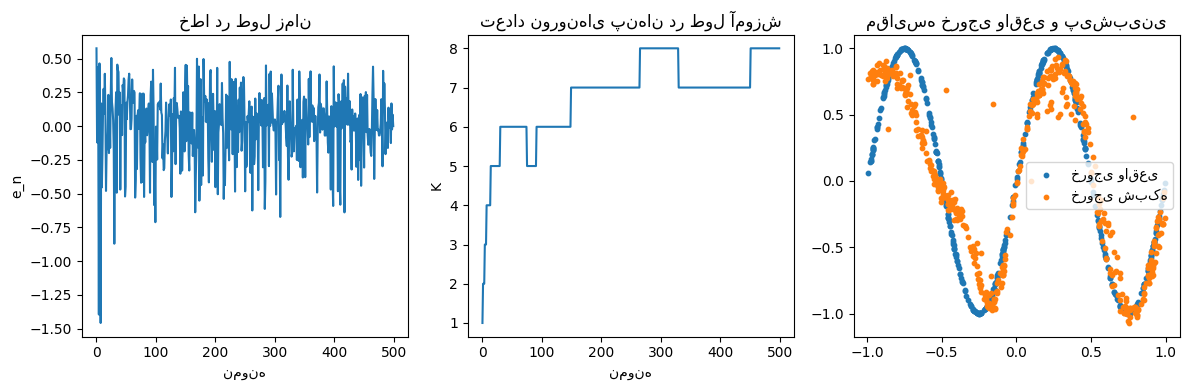

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def rbf(x, mu, sigma):
    """تابع گوسی RBF"""
    return np.exp(-np.linalg.norm(x - mu) ** 2 / (2 * sigma ** 2))

def rbf_output(x, hidden_units):
    """خروجی شبکه RBF برای یک ورودی x"""
    if len(hidden_units) == 0:
        return 0.0
    y_hat = 0.0
    for unit in hidden_units:
        y_hat += unit["alpha"] * rbf(x, unit["mu"], unit["sigma"])
    return y_hat

def mran_step(xn, yn, state, params):
    """
    یک نمونه (xn, yn) را به شبکه می‌دهیم و:
    ۱) اگر لازم بود نورون جدید اضافه می‌کنیم (معیار رشد)
    ۲) وزن‌ها را به‌روزرسانی می‌کنیم (LMS ساده)
    ۳) استراتژی هرس را اجرا می‌کنیم
    """

    hidden_units      = state["hidden_units"]       # لیست دیکشنری نورون‌ها
    pruning_counters  = state["pruning_counters"]   # شمارنده هرس هر نورون
    errors_window     = state["errors_window"]      # برای RMS (اگر خواستی استفاده کنی)

    eps      = params["eps"]        # آستانه تازگی ε
    e_min    = params["e_min"]      # آستانه خطا e_min
    kappa    = params["kappa"]      # ضریب برای سیگما
    eta      = params["eta"]        # نرخ یادگیری برای وزن‌ها
    delta    = params["delta"]      # آستانه مشارکت δ
    M_prune  = params["M_prune"]    # تعداد نمونه‌ی متوالی برای هرس

    # --- 1. اگر هیچ نورونی نداریم، اولین نورون را اضافه کن ---
    if len(hidden_units) == 0:
        y_hat = 0.0
        error = yn - y_hat

        first_unit = {
            "alpha": error,
            "mu": xn.copy(),
            "sigma": 1.0
        }
        hidden_units.append(first_unit)
        pruning_counters.append(0)
        errors_window.append(error)

        state["hidden_units"]      = hidden_units
        state["pruning_counters"]  = pruning_counters
        state["errors_window"]     = errors_window
        return y_hat, error, state

    # --- 2. پیش‌بینی خروجی و محاسبه خطا ---
    y_hat = rbf_output(xn, hidden_units)
    error = yn - y_hat
    errors_window.append(error)

    # --- 3. معیار رشد (تازگی + خطای بزرگ) ---
    centers = np.array([u["mu"] for u in hidden_units])
    dists   = np.linalg.norm(centers - xn, axis=1)
    min_dist = np.min(dists)
    nearest_mu = centers[np.argmin(dists)]

    novelty   = (min_dist > eps)        # تازگی
    big_error = (abs(error) > e_min)    # خطای بزرگ

    if novelty and big_error:
        sigma_new = kappa * np.linalg.norm(xn - nearest_mu)
        if sigma_new < 1e-6:  # جلوگیری از صفر شدن
            sigma_new = 1.0

        new_unit = {
            "alpha": error,
            "mu": xn.copy(),
            "sigma": sigma_new
        }
        hidden_units.append(new_unit)
        pruning_counters.append(0)   # شمارنده هرس برای نورون جدید

    else:
        # --- 4. به‌روزرسانی وزن‌ها (LMS ساده) ---
        for unit in hidden_units:
            phi = rbf(xn, unit["mu"], unit["sigma"])
            unit["alpha"] += eta * error * phi

    ok = []
    for unit in hidden_units:
        phi = rbf(xn, unit["mu"], unit["sigma"])
        ok.append(unit["alpha"] * phi)
    ok = np.array(ok)

    # اگر همه تقریباً صفر باشند، هرس انجام نمی‌دهیم
    if np.all(np.abs(ok) < 1e-12):
        state["hidden_units"]      = hidden_units
        state["pruning_counters"]  = pruning_counters
        state["errors_window"]     = errors_window
        return y_hat, error, state

    # ۵-۲. نرمال‌سازی مشارکت‌ها
    o_max = np.max(np.abs(ok))
    r_n = np.abs(ok) / o_max   # r_k^n برای همه نورون‌ها

    # ۵-۳. به‌روزرسانی شمارنده‌های هرس
    for k in range(len(hidden_units)):
        if r_n[k] < delta:
            pruning_counters[k] += 1
        else:
            pruning_counters[k] = 0

    # ۵-۴. حذف نورون‌هایی که M بار متوالی کم‌اهمیت بوده‌اند
    k_to_keep = [i for i, c in enumerate(pruning_counters) if c <= M_prune]

    if len(k_to_keep) < len(hidden_units):
        hidden_units     = [hidden_units[i] for i in k_to_keep]
        pruning_counters = [pruning_counters[i] for i in k_to_keep]

    # ذخیره در state
    state["hidden_units"]      = hidden_units
    state["pruning_counters"]  = pruning_counters
    state["errors_window"]     = errors_window

    return y_hat, error, state


def true_func(x):
    return np.sin(2 * np.pi * x[0])

np.random.seed(0)
N_samples = 500
X = np.random.uniform(-1, 1, size=(N_samples, 1))
T = np.array([true_func(xn) for xn in X])

# پارامترهای مدل
params = {
    "eps": 0.2,        # آستانه تازگی
    "e_min": 0.1,      # آستانه خطا
    "kappa": 0.5,      # ضریب سیگما
    "eta": 0.05,       # نرخ یادگیری وزن‌ها
    "delta": 0.05,     # آستانه مشارکت برای هرس
    "M_prune": 30      # اگر 30 نمونه‌ی پشت سر هم کم‌اهمیت بود → حذف
}

# حالت اولیه شبکه
state = {
    "hidden_units": [],
    "pruning_counters": [],
    "errors_window": []
}

y_preds = []
errors = []
K_list = []

for n in range(N_samples):
    xn, yn = X[n], T[n]
    y_hat, err, state = mran_step(xn, yn, state, params)

    y_preds.append(y_hat)
    errors.append(err)
    K_list.append(len(state["hidden_units"]))

print("تعداد نهایی نورون‌های پنهان:", len(state["hidden_units"]))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(errors)
plt.title("خطا در طول زمان")
plt.xlabel("نمونه")
plt.ylabel("e_n")

plt.subplot(1,3,2)
plt.plot(K_list)
plt.title("تعداد نورون‌های پنهان در طول آموزش")
plt.xlabel("نمونه")
plt.ylabel("K")

plt.subplot(1,3,3)
plt.scatter(X[:,0], T, s=10, label="خروجی واقعی")
plt.scatter(X[:,0], y_preds, s=10, label="خروجی شبکه")
plt.title("مقایسه خروجی واقعی و پیش‌بینی")
plt.legend()

plt.tight_layout()
plt.show()





تعداد نهایی نورون‌های پنهان: 15


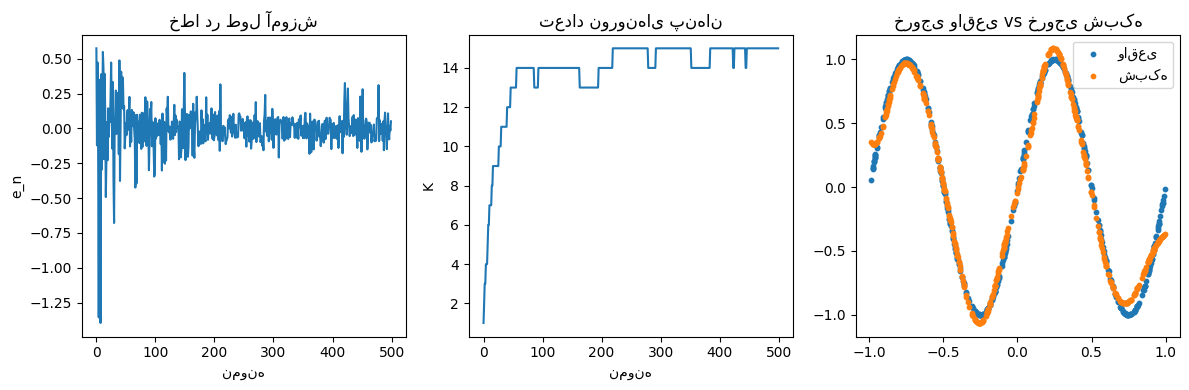

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# تابع گوسی RBF
def rbf(x, mu, sigma):
    return np.exp(-np.linalg.norm(x - mu) ** 2 / (2.0 * sigma ** 2))

# خروجی شبکه RBF برای یک ورودی
def rbf_output(x, hidden_units):
    if len(hidden_units) == 0:
        return 0.0
    y_hat = 0.0
    for unit in hidden_units:
        y_hat += unit["alpha"] * rbf(x, unit["mu"], unit["sigma"])
    return y_hat

# یک قدم آموزش: رشد + هرس + به‌روزرسانی وزن‌ها
def train_step(xn, yn, state, params):
    hidden_units     = state["hidden_units"]
    pruning_counters = state["pruning_counters"]

    eps    = params["eps"]     # ε
    e_min  = params["e_min"]   # e_min
    kappa  = params["kappa"]   # κ
    eta    = params["eta"]     # η
    delta  = params["delta"]   # δ
    M      = params["M"]       # تعداد نمونه متوالی برای هرس
    sigma0 = params["sigma0"]  # سیگمای اولیه

    # اگر هیچ نورونی نداریم، اولین نورون را بساز
    if len(hidden_units) == 0:
        y_hat = 0.0
        e_n = yn - y_hat

        first_unit = {
            "alpha": e_n,
            "mu": xn.copy(),
            "sigma": sigma0
        }
        hidden_units.append(first_unit)
        pruning_counters.append(0)

        state["hidden_units"] = hidden_units
        state["pruning_counters"] = pruning_counters
        return y_hat, e_n, state

    # خروجی و خطا
    y_hat = rbf_output(xn, hidden_units)
    e_n = yn - y_hat

    # معیار رشد: تازگی + خطای بزرگ
    centers = np.array([u["mu"] for u in hidden_units])
    dists = np.linalg.norm(centers - xn, axis=1)
    min_dist = np.min(dists)
    nearest_mu = centers[np.argmin(dists)]

    novelty   = (min_dist > eps)
    big_error = (abs(e_n) > e_min)

    if novelty and big_error:
        # اضافه کردن نورون جدید
        sigma_new = kappa * np.linalg.norm(xn - nearest_mu)
        if sigma_new < 1e-6:
            sigma_new = sigma0

        new_unit = {
            "alpha": e_n,
            "mu": xn.copy(),
            "sigma": sigma_new
        }
        hidden_units.append(new_unit)
        pruning_counters.append(0)

    else:
        # به‌روزرسانی وزن‌ها با LMS: α_k(n) = α_k(n-1) + η e_n φ_k(x_n)
        for unit in hidden_units:
            phi = rbf(xn, unit["mu"], unit["sigma"])
            unit["alpha"] = unit["alpha"] + eta * e_n * phi

    # استراتژی هرس:
    # محاسبه مشارکت o_k^n = α_k φ_k(x_n)
    ok = []
    for unit in hidden_units:
        phi = rbf(xn, unit["mu"], unit["sigma"])
        ok.append(unit["alpha"] * phi)
    ok = np.array(ok)

    if np.all(np.abs(ok) < 1e-12):
        state["hidden_units"] = hidden_units
        state["pruning_counters"] = pruning_counters
        return y_hat, e_n, state

    # نرمال‌سازی r_k^n
    o_max = np.max(np.abs(ok))
    r_n = np.abs(ok) / o_max

    # به‌روزرسانی شمارنده‌های هرس
    for k in range(len(hidden_units)):
        if r_n[k] < delta:
            pruning_counters[k] += 1
        else:
            pruning_counters[k] = 0

    # حذف نورون‌هایی که M بار متوالی کم‌اهمیت بوده‌اند
    idx_keep = [i for i, c in enumerate(pruning_counters) if c <= M]
    if len(idx_keep) < len(hidden_units):
        hidden_units     = [hidden_units[i] for i in idx_keep]
        pruning_counters = [pruning_counters[i] for i in idx_keep]

    state["hidden_units"] = hidden_units
    state["pruning_counters"] = pruning_counters
    return y_hat, e_n, state

# حلقه کامل آموزش
def train_rbf_mran(X_train, T_train, params, n_epochs=1):
    state = {
        "hidden_units": [],
        "pruning_counters": []
    }

    errors_history = []
    K_history = []

    for epoch in range(n_epochs):
        for n in range(len(X_train)):
            xn = X_train[n]
            yn = T_train[n]

            y_hat, e_n, state = train_step(xn, yn, state, params)

            errors_history.append(e_n)
            K_history.append(len(state["hidden_units"]))

    return state, np.array(errors_history), np.array(K_history)

# مثال ساده برای تست (اینجا می‌تونی دیتای خودت رو جایگزین کنی)
if __name__ == "__main__":
    np.random.seed(0)
    N = 500
    X_train = np.random.uniform(-1, 1, size=(N, 1))

    def true_func(x):
        return np.sin(2 * np.pi * x[0])

    T_train = np.array([true_func(x) for x in X_train])

    # پارامترها (طبق پیشنهاد متن می‌تونی با search grid تنظیم کنی)
    params = {
        "eps": 0.1,     # ε
        "e_min": 0.05,  # e_min
        "kappa": 0.8,   # κ
        "M": 60,        # M
        "eta": 0.05,    # η
        "delta": 0.1,   # δ
        "sigma0": 1.0   # سیگمای اولیه
    }

    state, errors_history, K_history = train_rbf_mran(X_train, T_train, params, n_epochs=1)

    print("تعداد نهایی نورون‌های پنهان:", len(state["hidden_units"]))

    # رسم چند نمودار برای بررسی رفتار (اختیاری)
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.plot(errors_history)
    plt.title("خطا در طول آموزش")
    plt.xlabel("نمونه")
    plt.ylabel("e_n")

    plt.subplot(1,3,2)
    plt.plot(K_history)
    plt.title("تعداد نورون‌های پنهان")
    plt.xlabel("نمونه")
    plt.ylabel("K")

    plt.subplot(1,3,3)
    y_pred_all = [rbf_output(x, state["hidden_units"]) for x in X_train]
    plt.scatter(X_train[:,0], T_train, s=10, label="واقعی")
    plt.scatter(X_train[:,0], y_pred_all, s=10, label="شبکه")
    plt.title("خروجی واقعی vs خروجی شبکه")
    plt.legend()

    plt.tight_layout()
    plt.show()


بهترین هایپرپارامترها:
{'eps': 0.05, 'e_min': 0.01, 'kappa': 0.8, 'M': 60, 'eta': 0.05, 'delta': 0.05, 'sigma0': 1.0}
کمترین RMSE روی داده تست: 0.05011268335367308
RMSE روی داده آموزش: 0.04700363435702665
RMSE روی داده تست: 0.05011268335367308
تعداد نهایی نورون‌های پنهان: 28


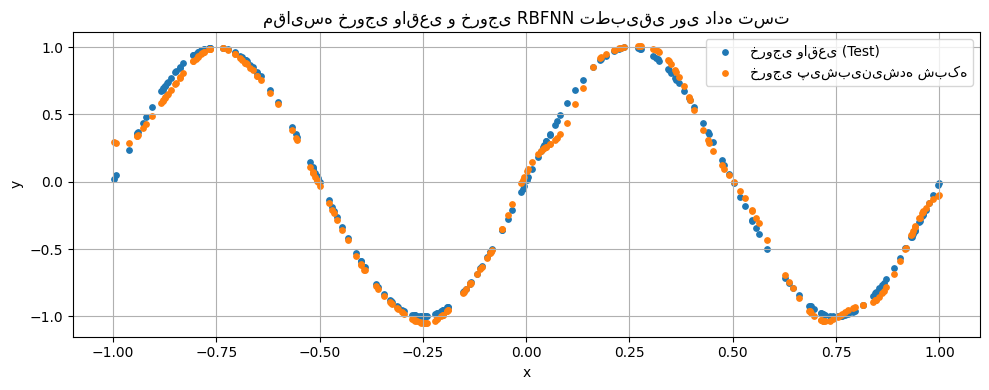

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def rbf(x, mu, sigma):
    return np.exp(-np.linalg.norm(x - mu) ** 2 / (2.0 * sigma ** 2))

def rbf_output(x, hidden_units):
    if len(hidden_units) == 0:
        return 0.0
    y_hat = 0.0
    for unit in hidden_units:
        y_hat += unit["alpha"] * rbf(x, unit["mu"], unit["sigma"])
    return y_hat

# یک قدم آموزش: رشد + هرس + به‌روزرسانی وزن‌ها
def train_step(xn, yn, state, params):
    hidden_units     = state["hidden_units"]
    pruning_counters = state["pruning_counters"]

    eps    = params["eps"]
    e_min  = params["e_min"]
    kappa  = params["kappa"]
    eta    = params["eta"]
    delta  = params["delta"]
    M      = params["M"]
    sigma0 = params["sigma0"]

    # اگر هیچ نورونی نداریم، اولین نورون را بساز
    if len(hidden_units) == 0:
        y_hat = 0.0
        e_n = yn - y_hat
        first_unit = {
            "alpha": e_n,
            "mu": xn.copy(),
            "sigma": sigma0
        }
        hidden_units.append(first_unit)
        pruning_counters.append(0)
        state["hidden_units"] = hidden_units
        state["pruning_counters"] = pruning_counters
        return y_hat, e_n, state

    # خروجی و خطا
    y_hat = rbf_output(xn, hidden_units)
    e_n = yn - y_hat

    # معیار رشد: تازگی + خطای بزرگ
    centers = np.array([u["mu"] for u in hidden_units])
    dists = np.linalg.norm(centers - xn, axis=1)
    min_dist = np.min(dists)
    nearest_mu = centers[np.argmin(dists)]
    novelty   = (min_dist > eps)
    big_error = (abs(e_n) > e_min)

    if novelty and big_error:
        sigma_new = kappa * np.linalg.norm(xn - nearest_mu)
        if sigma_new < 1e-6:
            sigma_new = sigma0
        new_unit = {
            "alpha": e_n,
            "mu": xn.copy(),
            "sigma": sigma_new
        }
        hidden_units.append(new_unit)
        pruning_counters.append(0)
    else:
        # به‌روزرسانی وزن‌ها با LMS
        for unit in hidden_units:
            phi = rbf(xn, unit["mu"], unit["sigma"])
            unit["alpha"] = unit["alpha"] + eta * e_n * phi

    # استراتژی هرس
    ok = []
    for unit in hidden_units:
        phi = rbf(xn, unit["mu"], unit["sigma"])
        ok.append(unit["alpha"] * phi)
    ok = np.array(ok)

    if np.all(np.abs(ok) < 1e-12):
        state["hidden_units"] = hidden_units
        state["pruning_counters"] = pruning_counters
        return y_hat, e_n, state

    o_max = np.max(np.abs(ok))
    r_n = np.abs(ok) / o_max

    for k in range(len(hidden_units)):
        if r_n[k] < delta:
            pruning_counters[k] += 1
        else:
            pruning_counters[k] = 0

    idx_keep = [i for i, c in enumerate(pruning_counters) if c <= M]
    if len(idx_keep) < len(hidden_units):
        hidden_units     = [hidden_units[i] for i in idx_keep]
        pruning_counters = [pruning_counters[i] for i in idx_keep]

    state["hidden_units"] = hidden_units
    state["pruning_counters"] = pruning_counters
    return y_hat, e_n, state

# حلقه آموزش برای یک مجموعه داده
def train_rbf_mran(X_train, T_train, params, n_epochs=1):
    state = {
        "hidden_units": [],
        "pruning_counters": []
    }
    for epoch in range(n_epochs):
        for n in range(len(X_train)):
            xn = X_train[n]
            yn = T_train[n]
            _, _, state = train_step(xn, yn, state, params)
    return state

# پیش‌بینی روی یک مجموعه داده
def predict_rbf_mran(X, state):
    return np.array([rbf_output(x, state["hidden_units"]) for x in X])

# RMSE ساده
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# -------------------------------------------------
# بخش ۲.۲.۲ : آموزش روی train ، ارزیابی روی test و پیدا کردن بهترین هایپرپارامترها
# -------------------------------------------------
if __name__ == "__main__":
    np.random.seed(0)

    # اینجا برای مثال یک دیتاست ساده می‌سازیم؛ در پروژه خودت X و T واقعی را بگذار
    N = 800
    X = np.random.uniform(-1, 1, size=(N, 1))

    def true_func(x):
        return np.sin(2 * np.pi * x[0])

    T = np.array([true_func(x) for x in X])

    # جدا کردن داده آموزش و تست (مثلاً 70٪ آموزش، 30٪ تست)
    split = int(0.7 * N)
    X_train, X_test = X[:split], X[split:]
    T_train, T_test = T[:split], T[split:]

    # شبکه را با search grid روی چند پارامتر تنظیم می‌کنیم
    eps_list   = [0.05, 0.1, 0.15, 0.2]
    e_min_list = [0.01, 0.05, 0.1]
    eta_list   = [0.01, 0.05]
    delta_list = [0.05, 0.1]

    kappa  = 0.8   # طبق پیشنهاد تمرین
    M      = 60
    sigma0 = 1.0

    best_params = None
    best_state = None
    best_rmse = np.inf

    for eps in eps_list:
        for e_min in e_min_list:
            for eta in eta_list:
                for delta in delta_list:
                    params = {
                        "eps": eps,
                        "e_min": e_min,
                        "kappa": kappa,
                        "M": M,
                        "eta": eta,
                        "delta": delta,
                        "sigma0": sigma0
                    }
                    state = train_rbf_mran(X_train, T_train, params, n_epochs=1)
                    y_test_pred = predict_rbf_mran(X_test, state)
                    rmse_test = rmse(T_test, y_test_pred)

                    if rmse_test < best_rmse:
                        best_rmse = rmse_test
                        best_params = params.copy()
                        best_state = state

    print("بهترین هایپرپارامترها:")
    print(best_params)
    print("کمترین RMSE روی داده تست:", best_rmse)

    # با بهترین پارامترها، RMSE روی train و test را حساب می‌کنیم
    y_train_pred = predict_rbf_mran(X_train, best_state)
    y_test_pred  = predict_rbf_mran(X_test, best_state)

    rmse_train = rmse(T_train, y_train_pred)
    rmse_test  = rmse(T_test, y_test_pred)

    print("RMSE روی داده آموزش:", rmse_train)
    print("RMSE روی داده تست:", rmse_test)
    print("تعداد نهایی نورون‌های پنهان:", len(best_state["hidden_units"]))

    # رسم خروجی‌های پیش‌بینی‌شده در کنار خروجی واقعی
    plt.figure(figsize=(10,4))
    plt.scatter(X_test[:,0], T_test, s=15, label="خروجی واقعی (Test)")
    plt.scatter(X_test[:,0], y_test_pred, s=15, label="خروجی پیش‌بینی‌شده شبکه")
    plt.title("مقایسه خروجی واقعی و خروجی RBFNN تطبیقی روی داده تست")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


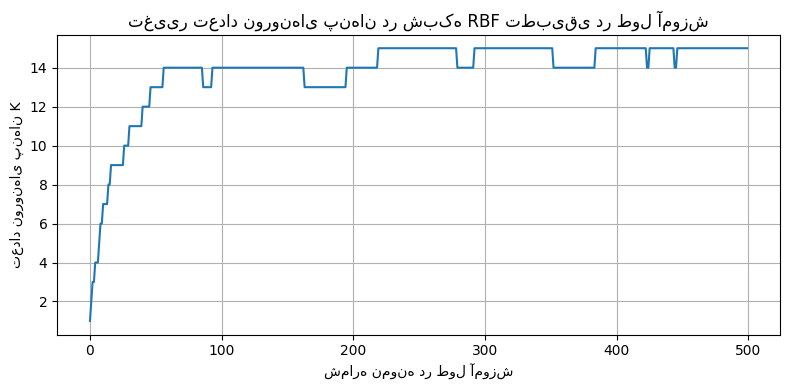

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def train_rbf_mran_with_history(X_train, T_train, params, n_epochs=1):
    state = {
        "hidden_units": [],
        "pruning_counters": []
    }

    K_history = []   # تعداد نورون‌های پنهان در هر نمونه

    for epoch in range(n_epochs):
        for n in range(len(X_train)):
            xn = X_train[n]
            yn = T_train[n]
            _, _, state = train_step(xn, yn, state, params)
            K_history.append(len(state["hidden_units"]))

    return state, np.array(K_history)

# مثال تست (اینجا می‌تونی دیتای خودت رو بگذاری)
if __name__ == "__main__":
    np.random.seed(0)
    N = 500
    X_train = np.random.uniform(-1, 1, size=(N, 1))

    def true_func(x):
        return np.sin(2 * np.pi * x[0])

    T_train = np.array([true_func(x) for x in X_train])

    params = {
        "eps": 0.1,
        "e_min": 0.05,
        "kappa": 0.8,
        "M": 60,
        "eta": 0.05,
        "delta": 0.1,
        "sigma0": 1.0
    }

    state, K_history = train_rbf_mran_with_history(X_train, T_train, params, n_epochs=1)

    # رسم نمودار تغییر تعداد نورون‌های پنهان در طول آموزش
    plt.figure(figsize=(8,4))
    plt.plot(K_history)
    plt.xlabel("شماره نمونه در طول آموزش")
    plt.ylabel("تعداد نورون‌های پنهان K")
    plt.title("تغییر تعداد نورون‌های پنهان در شبکه RBF تطبیقی در طول آموزش")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


نتایج RBFNN ایستا:
  K نهایی (ثابت): 20
  sigma: 0.3
  lambda: 0.0
  RMSE روی داده تست: 1.7036648565894692e-05

نتایج RBFNN تطبیقی:
  تعداد نهایی نورون‌های پنهان: 28
  بهترین پارامترها: {'eps': 0.05, 'e_min': 0.01, 'kappa': 0.8, 'M': 60, 'eta': 0.05, 'delta': 0.05, 'sigma0': 1.0}
  RMSE روی داده تست: 0.05011268335367308


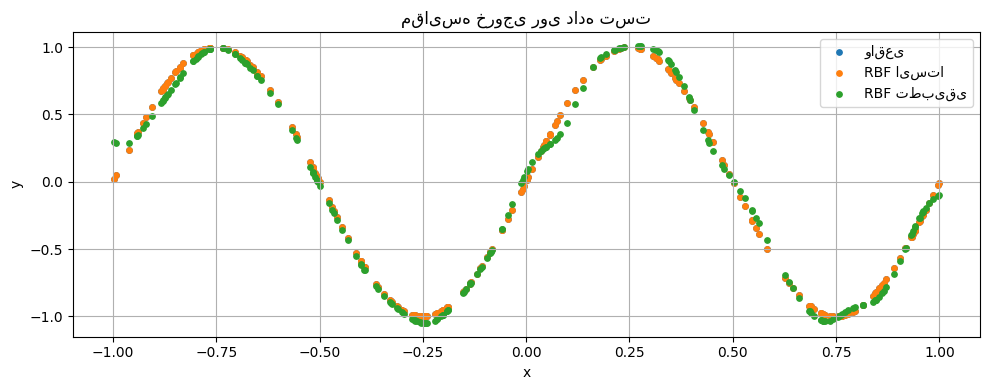

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def rbf(x, mu, sigma):
    return np.exp(-np.linalg.norm(x - mu) ** 2 / (2.0 * sigma ** 2))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# ۱) RBFNN ایستا
def build_phi(X, centers, sigma):
    N = X.shape[0]
    K = centers.shape[0]
    Phi = np.zeros((N, K))
    for i in range(N):
        for k in range(K):
            Phi[i, k] = rbf(X[i], centers[k], sigma)
    return Phi

def train_static_rbf(X_train, T_train, X_test, T_test,
                     K_list, sigma_list, lambda_list):
    best_model = None
    best_rmse = np.inf

    for K in K_list:
        # خوشه‌بندی K-Means برای تعیین مراکز
        kmeans = KMeans(n_clusters=K, random_state=0)
        kmeans.fit(X_train)
        centers = kmeans.cluster_centers_

        for sigma in sigma_list:
            Phi_train = build_phi(X_train, centers, sigma)
            Phi_test  = build_phi(X_test,  centers, sigma)

            for lam in lambda_list:
                # حل رگرسیون خطی با رگولاریزیشن L2
                I = np.eye(K)
                alpha = np.linalg.solve(Phi_train.T @ Phi_train + lam * I,
                                        Phi_train.T @ T_train)

                T_test_pred = Phi_test @ alpha
                test_rmse = rmse(T_test, T_test_pred)

                if test_rmse < best_rmse:
                    best_rmse = test_rmse
                    best_model = {
                        "centers": centers,
                        "sigma": sigma,
                        "alpha": alpha,
                        "K": K,
                        "lambda": lam
                    }

    return best_model, best_rmse

# ۲) RBFNN تطبیقی (رشد + هرس)

def rbf_output(x, hidden_units):
    if len(hidden_units) == 0:
        return 0.0
    y_hat = 0.0
    for unit in hidden_units:
        y_hat += unit["alpha"] * rbf(x, unit["mu"], unit["sigma"])
    return y_hat

def train_step_adaptive(xn, yn, state, params):
    hidden_units     = state["hidden_units"]
    pruning_counters = state["pruning_counters"]

    eps    = params["eps"]
    e_min  = params["e_min"]
    kappa  = params["kappa"]
    eta    = params["eta"]
    delta  = params["delta"]
    M      = params["M"]
    sigma0 = params["sigma0"]

    # اگر هیچ نورونی نداریم
    if len(hidden_units) == 0:
        y_hat = 0.0
        e_n = yn - y_hat
        first_unit = {
            "alpha": e_n,
            "mu": xn.copy(),
            "sigma": sigma0
        }
        hidden_units.append(first_unit)
        pruning_counters.append(0)
        state["hidden_units"] = hidden_units
        state["pruning_counters"] = pruning_counters
        return y_hat, e_n, state

    # خروجی و خطا
    y_hat = rbf_output(xn, hidden_units)
    e_n = yn - y_hat

    centers = np.array([u["mu"] for u in hidden_units])
    dists   = np.linalg.norm(centers - xn, axis=1)
    min_dist = np.min(dists)
    nearest_mu = centers[np.argmin(dists)]

    novelty   = (min_dist > eps)
    big_error = (abs(e_n) > e_min)

    if novelty and big_error:
        sigma_new = kappa * np.linalg.norm(xn - nearest_mu)
        if sigma_new < 1e-6:
            sigma_new = sigma0
        new_unit = {
            "alpha": e_n,
            "mu": xn.copy(),
            "sigma": sigma_new
        }
        hidden_units.append(new_unit)
        pruning_counters.append(0)
    else:
        # به‌روزرسانی وزن‌ها (LMS)
        for unit in hidden_units:
            phi = rbf(xn, unit["mu"], unit["sigma"])
            unit["alpha"] = unit["alpha"] + eta * e_n * phi

    # هرس
    ok = []
    for unit in hidden_units:
        phi = rbf(xn, unit["mu"], unit["sigma"])
        ok.append(unit["alpha"] * phi)
    ok = np.array(ok)

    if np.all(np.abs(ok) < 1e-12):
        state["hidden_units"] = hidden_units
        state["pruning_counters"] = pruning_counters
        return y_hat, e_n, state

    o_max = np.max(np.abs(ok))
    r_n = np.abs(ok) / o_max

    for k in range(len(hidden_units)):
        if r_n[k] < delta:
            pruning_counters[k] += 1
        else:
            pruning_counters[k] = 0

    idx_keep = [i for i, c in enumerate(pruning_counters) if c <= M]
    if len(idx_keep) < len(hidden_units):
        hidden_units     = [hidden_units[i] for i in idx_keep]
        pruning_counters = [pruning_counters[i] for i in idx_keep]

    state["hidden_units"] = hidden_units
    state["pruning_counters"] = pruning_counters
    return y_hat, e_n, state

def train_adaptive_rbf(X_train, T_train, params, n_epochs=1):
    state = {
        "hidden_units": [],
        "pruning_counters": []
    }
    for epoch in range(n_epochs):
        for n in range(len(X_train)):
            xn = X_train[n]
            yn = T_train[n]
            _, _, state = train_step_adaptive(xn, yn, state, params)
    return state

def predict_adaptive_rbf(X, state):
    return np.array([rbf_output(x, state["hidden_units"]) for x in X])

def search_best_adaptive(X_train, T_train, X_test, T_test,
                         eps_list, e_min_list, eta_list, delta_list,
                         kappa=0.8, M=60, sigma0=1.0):
    best_state = None
    best_params = None
    best_rmse = np.inf

    for eps in eps_list:
        for e_min in e_min_list:
            for eta in eta_list:
                for delta in delta_list:
                    params = {
                        "eps": eps,
                        "e_min": e_min,
                        "kappa": kappa,
                        "M": M,
                        "eta": eta,
                        "delta": delta,
                        "sigma0": sigma0
                    }
                    state = train_adaptive_rbf(X_train, T_train, params, n_epochs=1)
                    y_test_pred = predict_adaptive_rbf(X_test, state)
                    test_rmse = rmse(T_test, y_test_pred)

                    if test_rmse < best_rmse:
                        best_rmse = test_rmse
                        best_state = state
                        best_params = params.copy()

    return best_state, best_params, best_rmse

# ۳) مقایسه نهایی دو مدل

if __name__ == "__main__":
    np.random.seed(0)

    # اینجا برای مثال دیتای سینوسی ساختیم؛ در پروژه خودت X و T واقعی را بگذار
    N = 800
    X = np.random.uniform(-1, 1, size=(N, 1))

    def true_func(x):
        return np.sin(2 * np.pi * x[0])

    T = np.array([true_func(x) for x in X])

    # جداسازی آموزش و تست
    split = int(0.7 * N)
    X_train, X_test = X[:split], X[split:]
    T_train, T_test = T[:split], T[split:]

    # ---- RBF ایستا ----
    K_list      = [5, 10, 15, 20]         # لیست مقادیر ممکن K
    sigma_list  = [0.1, 0.2, 0.3, 0.5]    # سیگماهای ممکن
    lambda_list = [0.0, 0.001, 0.01]      # رگولاریزیشن

    static_model, static_rmse_test = train_static_rbf(
        X_train, T_train, X_test, T_test,
        K_list, sigma_list, lambda_list
    )

    print("نتایج RBFNN ایستا:")
    print("  K نهایی (ثابت):", static_model["K"])
    print("  sigma:", static_model["sigma"])
    print("  lambda:", static_model["lambda"])
    print("  RMSE روی داده تست:", static_rmse_test)

    # ---- RBF تطبیقی ----
    eps_list   = [0.05, 0.1, 0.15]
    e_min_list = [0.01, 0.05, 0.1]
    eta_list   = [0.01, 0.05]
    delta_list = [0.05, 0.1]

    adaptive_state, adaptive_params, adaptive_rmse_test = search_best_adaptive(
        X_train, T_train, X_test, T_test,
        eps_list, e_min_list, eta_list, delta_list,
        kappa=0.8, M=60, sigma0=1.0
    )

    K_adaptive_final = len(adaptive_state["hidden_units"])

    print("\nنتایج RBFNN تطبیقی:")
    print("  تعداد نهایی نورون‌های پنهان:", K_adaptive_final)
    print("  بهترین پارامترها:", adaptive_params)
    print("  RMSE روی داده تست:", adaptive_rmse_test)

    # می‌توان برای مقایسه، خروجی هر دو مدل را هم رسم کرد (اختیاری)
    y_static_test = build_phi(X_test,
                              static_model["centers"],
                              static_model["sigma"]) @ static_model["alpha"]
    y_adapt_test  = predict_adaptive_rbf(X_test, adaptive_state)

    plt.figure(figsize=(10,4))
    plt.scatter(X_test[:,0], T_test, s=15, label="واقعی")
    plt.scatter(X_test[:,0], y_static_test, s=15, label="RBF ایستا")
    plt.scatter(X_test[:,0], y_adapt_test,  s=15, label="RBF تطبیقی")
    plt.title("مقایسه خروجی روی داده تست")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


PCA variance: [0.45501312 0.18889133]


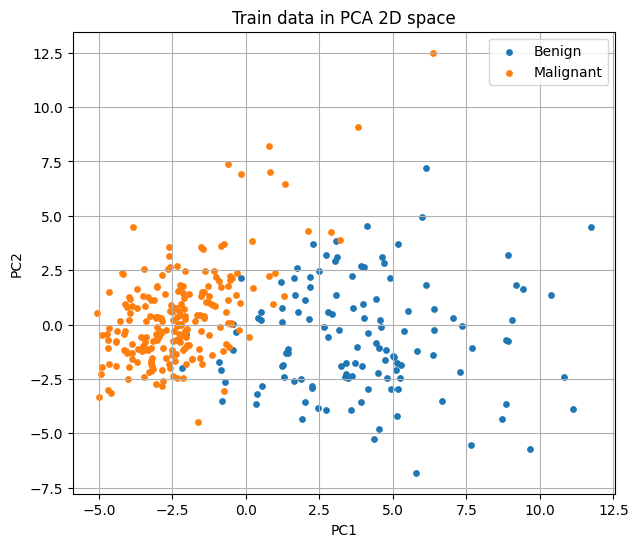

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# random_state رو بذار دو رقم آخر شماره دانشجوییت
RANDOM_STATE = 73

# لود دیتاست رسمی (بدون نیاز به دانلود)
data = load_breast_cancer()
X = data.data
y = data.target

# تقسیم train/val/test (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=y_temp
)

# استانداردسازی
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# PCA برای visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
pca.fit(X_train_std)

X_train_pca = pca.transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

print("PCA variance:", pca.explained_variance_ratio_)

# نمایش دوبعدی داده‌های train فقط جهت مشاهده
plt.figure(figsize=(7,6))
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], label="Benign", s=15)
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], label="Malignant", s=15)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Train data in PCA 2D space")
plt.grid(True)
plt.show()


In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import numpy as np

RANDOM_STATE = 73  # دو رقم آخر شماره دانشجویی‌ات را بگذار

data = load_breast_cancer()
X = data.data
y = data.target  # 0 = benign, 1 = malignant

# تقسیم 60/20/20 به صورت لایه‌بندی‌شده
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=y_temp
)

# استانداردسازی فقط با فیت روی train
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_val_std   = scaler.transform(X_val)
X_test_std  = scaler.transform(X_test)

# --------------------------
# 2) آموزش SVC خطی
# --------------------------
# اگر خواستی C را با ولیدیشن تنظیم کنی، می‌توانی روی چند مقدار امتحان کنی.
# فعلاً C=1.0
clf = SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE, probability=False)
clf.fit(X_train_std, y_train)

# --------------------------
# 3) محاسبه بردار w و حاشیه 1/||w||
# --------------------------
# در SVC خطی: w = sum_i (α_i y_i x_i)  ، و در اسکیکیت-لرن dual_coef_ همان α_i y_i است.
# support_vectors_ هم x_i ها هستند.
alpha_y = clf.dual_coef_[0]          # شکل: (n_SV,)
support_vecs = clf.support_vectors_   # شکل: (n_SV, d)

# w = Σ α_i y_i x_i
w = np.dot(alpha_y, support_vecs)     # شکل: (d,)
norm_w = np.linalg.norm(w)
margin = 1.0 / norm_w

print("||w|| =", norm_w)
print("حاشیه 1/||w|| =", margin)

# (برای چک: خود clf.coef_ هم w را می‌دهد؛ می‌توانی مقایسه کنی)
# print("coef_ from SVC:", clf.coef_)

# --------------------------
# 4) محاسبه معیارها روی validation و test
# --------------------------

def evaluate_split(X_split_std, y_split, split_name=""):
    y_pred = clf.predict(X_split_std)
    # برای ROC-AUC از decision_function استفاده می‌کنیم (امتیاز فاصله از مرز)
    scores = clf.decision_function(X_split_std)

    acc = accuracy_score(y_split, y_pred)
    prec = precision_score(y_split, y_pred)
    rec = recall_score(y_split, y_pred)
    f1 = f1_score(y_split, y_pred)
    auc = roc_auc_score(y_split, scores)

    print(f"\nنتایج روی مجموعه {split_name}:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")

    return acc, prec, rec, f1, auc

# ارزیابی روی validation و test
val_metrics = evaluate_split(X_val_std, y_val, split_name="validation")
test_metrics = evaluate_split(X_test_std, y_test, split_name="test")


||w|| = 2.3701604085360652
حاشیه 1/||w|| = 0.42191237200593196

نتایج روی مجموعه validation:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC-AUC  : 1.0000

نتایج روی مجموعه test:
Accuracy : 0.9561
Precision: 0.9459
Recall   : 0.9859
F1-score : 0.9655
ROC-AUC  : 0.9915


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

RANDOM_STATE = 73  # دو رقم آخر شماره دانشجویی

data = load_breast_cancer()
X = data.data
y = data.target

# تقسیم 60/20/20 به صورت لایه‌بندی‌شده
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=y_temp
)

# استانداردسازی
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std   = scaler.transform(X_val)
X_test_std  = scaler.transform(X_test)


C_values = [0.01, 0.1, 1, 10, 100]

# جدول نتایج
results = []


for C in C_values:
    clf = SVC(kernel="linear", C=C, random_state=RANDOM_STATE)
    clf.fit(X_train_std, y_train)

    # معیارها روی validation
    y_val_pred = clf.predict(X_val_std)
    scores_val = clf.decision_function(X_val_std)

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, scores_val)

    # تعداد support vector ها
    n_sv = np.sum(clf.n_support_)  # مجموع SV های دو کلاس

    # ذخیره در جدول
    results.append({
        "C": C,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": auc,
        "Support Vectors": n_sv
    })

# تبدیل نتایج به DataFrame مرتب
results_df = pd.DataFrame(results)
print(results_df)




        C  Accuracy  Precision    Recall        F1   ROC-AUC  Support Vectors
0    0.01  0.956140   0.935065  1.000000  0.966443  0.998677               78
1    0.10  0.982456   0.972973  1.000000  0.986301  0.999339               41
2    1.00  1.000000   1.000000  1.000000  1.000000  1.000000               30
3   10.00  1.000000   1.000000  1.000000  1.000000  1.000000               27
4  100.00  0.982456   1.000000  0.972222  0.985915  0.999008               23


بهترین C بر اساس validation: 1

عملکرد روی داده تست:
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1: 0.9655172413793104


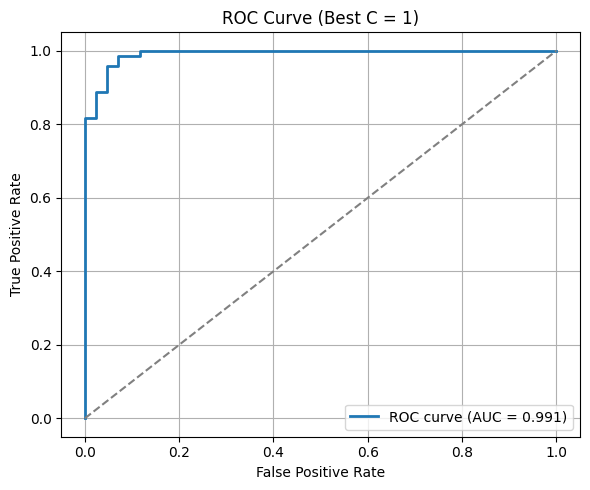

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve,
    accuracy_score, precision_score, recall_score, f1_score
)

RANDOM_STATE = 73

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=y_temp
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_val_std   = scaler.transform(X_val)
X_test_std  = scaler.transform(X_test)

C_values = [0.01, 0.1, 1, 10, 100]
best_c = None
best_f1_val = -1

for C in C_values:
    clf = SVC(kernel="linear", C=C, random_state=RANDOM_STATE)
    clf.fit(X_train_std, y_train)

    y_val_pred = clf.predict(X_val_std)
    f1_val = f1_score(y_val, y_val_pred)

    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_c = C

print("بهترین C بر اساس validation:", best_c)


clf_best = SVC(kernel="linear", C=best_c, random_state=RANDOM_STATE)
clf_best.fit(X_train_std, y_train)

# -----------------------------
# 4) پیش‌بینی روی تست
# -----------------------------
y_test_pred = clf_best.predict(X_test_std)
scores_test = clf_best.decision_function(X_test_std)

# عملکرد روی test
print("\nعملکرد روی داده تست:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1:", f1_score(y_test, y_test_pred))

# -----------------------------
# 5) رسم ROC Curve
# -----------------------------
fpr, tpr, _ = roc_curve(y_test, scores_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (Best C = {best_c})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# 6) رسم Precision–Recall Curve
# -----------------------------
prec, rec, _ = precision_recall_curve(y_test, scores_test)
pr_auc = auc(rec, prec)

plt.figure(figsize=(6, 5))
plt.plot(rec, prec, label=f'PR curve (AUC = {pr_auc:.3f})', linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (Best C = {best_c})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
